In [ ]:
'''
    Project Architecture
    Install dependencies
    Record Audio from Microphone
    Setup of OpenAI Whisper 
    Speech-to-Text using OpenAI Whisper 
    How to train Alexa !
    Train a Simple Deep Learning Intent Model
    Action Engine
    Text-to-Speech Response

'''

# 1.. Project Architecture !

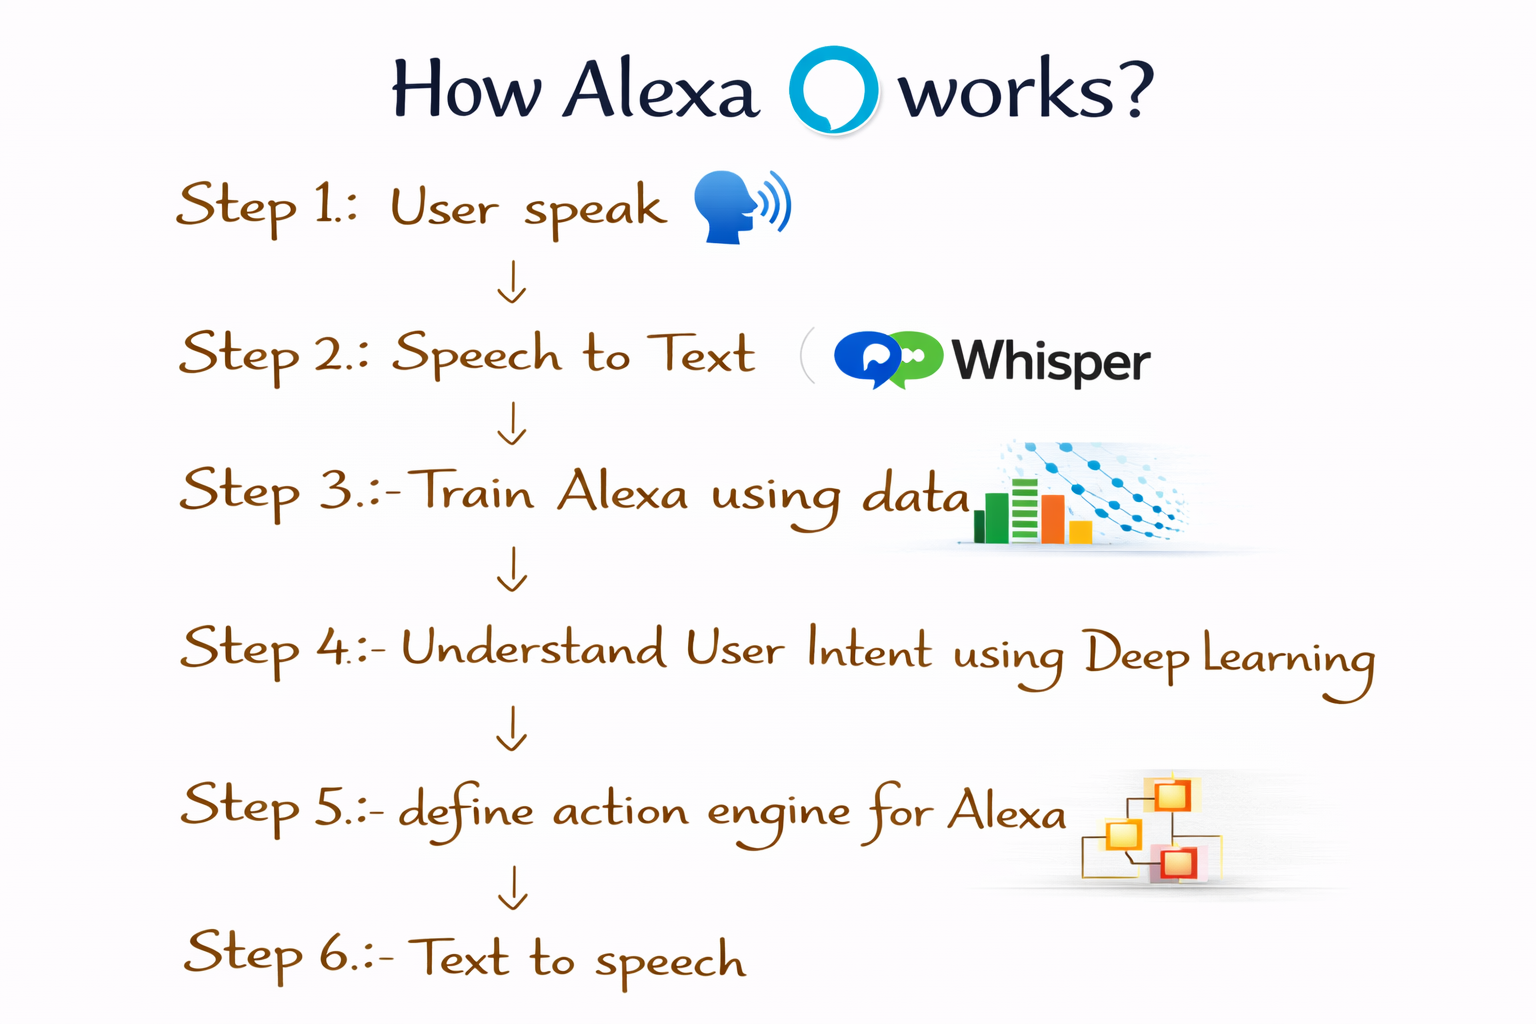

# Step 2 : Install dependencies !

In [ ]:
'''

Hi there , very first u have to do a JUpyter notebook setup for building Alexa assistant !


We are going to launch Anaconda Navigator !
If I go to env section ,  this is the base env ( which is a default env)
Whatever installations u will do , those packages will get stored in this env !

& u may getting only this base env option , if u have not created virutal env !
Will explain you just in a while what is a virtual env !


In the last case study , we have continued with this base env ( which is a default env)


1️⃣ But Different projects need different versions of packages !

Your voice assistant needs:

numpy==2.3.0
torch
openai-whisper

But another project might need:

numpy==1.26
different torch version


❌ If you run both Project on same environment , 
    One project breaks another !


Thats why you have to create a Virtual Environment?
& ✅ Virtual environment keeps versions project-specific..


So to do a setup of Virtual env , u have to follow these 5 steps !

'''

In [1]:
import sys
print(sys.prefix)

## The path of the active environment

C:\Users\shant\anaconda3\envs\data_analysis


In [2]:
!pip --version

pip 25.3 from C:\Users\shant\anaconda3\envs\data_analysis\Lib\site-packages\pip (python 3.12)



In [ ]:
!pip install pyautogui sounddevice scipy openai-whisper pyttsx3 torch sklearn pandas numpy==2.3.0

# 🎤 STEP 3 — Record Audio from Microphone

In [1]:
import sounddevice as sd
from scipy.io.wavfile import write

In [2]:
def record_audio(filename = "input.wav" , duration = 5 , fs = 48000):
    print("🎤 Listening...")
    recording = sd.rec(int(duration * fs) , samplerate = fs , channels=1)
    
    sd.wait()
    write(filename , fs , recording)
    print("✅ Audio Recorded")

In [17]:
record_audio(fs = 48000)

🎤 Listening...
✅ Audio Recorded


In [3]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (DroidCam Audio), MME (2 in, 0 out)
   2 Stereo Mix (Realtek(R) Audio), MME (2 in, 0 out)
   3 Microphone Array (Realtek(R) Au, MME (4 in, 0 out)
   4 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  5 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   6 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   7 Microphone (DroidCam Audio), Windows DirectSound (2 in, 0 out)
   8 Stereo Mix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 Microphone Array (Realtek(R) Audio), Windows DirectSound (4 in, 0 out)
  10 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  11 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 Speakers (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  13 Stereo Mix (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  14 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  15 Microphone (DroidCam Audio), Windows WASAPI (1 in, 0 out)
 

In [4]:
sd.default.device = (14 , 12)

In [5]:
record_audio(fs = 48000)

🎤 Listening...
✅ Audio Recorded


# 🧠 STEP 4 —  Setup of OpenAI Whisper
   


In [5]:
import os
import subprocess
import urllib

In [9]:
url = "https://www.gyan.dev/ffmpeg/builds/ffmpeg-release-essentials.zip"

os.makedirs(r"R:\2.. Entire_Data_Science_Projects\2.. DL/ffmpeg" , exist_ok=True)

In [12]:
urllib.request.urlretrieve(url , r"R:\2.. Entire_Data_Science_Projects\2.. DL/ffmpeg/ffmpeg.zip")

('R:\\2.. Entire_Data_Science_Projects\\2.. DL/ffmpeg/ffmpeg.zip',
 <http.client.HTTPMessage at 0x274b1a65400>)

In [6]:
os.environ["PATH"]

'C:\\Users\\shant\\anaconda3\\envs\\data_analysis;C:\\Users\\shant\\anaconda3\\envs\\data_analysis\\Library\\mingw-w64\\bin;C:\\Users\\shant\\anaconda3\\envs\\data_analysis\\Library\\usr\\bin;C:\\Users\\shant\\anaconda3\\envs\\data_analysis\\Library\\bin;C:\\Users\\shant\\anaconda3\\envs\\data_analysis\\Scripts;C:\\Users\\shant\\anaconda3\\envs\\data_analysis\\bin;C:\\Users\\shant\\anaconda3\\condabin;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files\\dotnet;C:\\Users\\shant\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\shant\\AppData\\Local\\Muse Hub\\lib;C:\\Users\\shant\\AppData\\Local\\Programs\\Ollama'

In [7]:
ffmpeg_path = r"R:\2.. Entire_Data_Science_Projects\2.. DL\ffmpeg\ffmpeg\ffmpeg-8.0.1-essentials_build\bin"

In [8]:
os.pathsep

';'

In [9]:
os.environ["PATH"] = os.environ["PATH"] + os.pathsep + ffmpeg_path

# 5.. Speech-to-Text using OpenAI Whisper
    

In [10]:
import whisper

In [11]:
model = whisper.load_model("base")

In [15]:
result = model.transcribe(r"R:\2.. Entire_Data_Science_Projects\2.. DL\Voice_Assistant/input.wav")

In [16]:
text = result["text"]
text

' If I execute this function it is listening. Here open'

In [14]:
def speech_to_text(audio_path):
    result = model.transcribe(audio_path)
    text = result["text"]
    print("You said : "  , text)
    return text.lower()

In [20]:
speech_to_text(r"R:\2.. Entire_Data_Science_Projects\2.. DL\Voice_Assistant/input.wav")

You said :   Open Google


' open google'

# 💬 STEP 6 — Prepare Training Data for to train Alexa !

In [17]:
import pandas as pd

In [18]:
alexa_df = pd.read_csv(r"R:\2.. Entire_Data_Science_Projects\2.. DL\Voice_Assistant/alexa_data.csv")

In [19]:
alexa_df.head()

,prompt,intent
0,wake me up 0,alarm
1,morning alarm 1,alarm
2,set an alarm 2,alarm
3,set an alarm 3,alarm
4,set an alarm 4,alarm


In [20]:
alexa_df.shape

(4785, 2)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
X = vectorizer.fit_transform(alexa_df["prompt"])

In [24]:
X.shape

(4785, 192)

In [25]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(4785, 192))

In [26]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Step 7.. Train a Simple Deep Learning Intent Model

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
intent_model = MLPClassifier(hidden_layer_sizes=(50 , 25) , max_iter=500)

In [29]:
intent_model.fit(X , alexa_df["intent"])

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(50, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",500
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",None


In [30]:
def predict_intent(text):
    X_test = vectorizer.transform([text])
    intent = intent_model.predict(X_test)[0]
    print("Detected Intent : " , intent)
    return intent

In [31]:
predict_intent("Set Alarm by 7 am")

Detected Intent :  alarm


np.str_('alarm')

In [32]:
predict_intent("Play song for me")

Detected Intent :  play_music


np.str_('play_music')

In [33]:
predict_intent("Add milk to my shopping list")

Detected Intent :  shopping_list


np.str_('shopping_list')

In [38]:
predict_intent("What is the news today ")

Detected Intent :  news


np.str_('news')

In [39]:
predict_intent("Who is the Prime Minister of India ?")

Detected Intent :  dictionary


np.str_('dictionary')

# ⚙️ STEP 8 — Action Engine
        

In [34]:

import webbrowser
import datetime
import random
import os
import re
import pyautogui


In [35]:
shopping_list = []

def perform_action(intent, prompt=""):
    
    # 🎵 PLAY MUSIC
    if intent == "play_music":
        webbrowser.open("https://www.youtube.com/results?search_query=music")
        return "Playing music on YouTube"

    # 🌐 OPEN WEBSITE
    elif intent == "open_website":
        prompt_lower = prompt.lower()
        
        # remove punctuation for safer matching
        cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', prompt_lower)

        if "youtube" in cleaned or "you tube" in cleaned:
            webbrowser.open("https://www.youtube.com")
            return "Opening YouTube"

        elif "google" in prompt_lower:
            webbrowser.open("https://www.google.com")
            return "Opening Google"

        elif "github" in prompt_lower:
            webbrowser.open("https://www.github.com")
            return "Opening GitHub"

        else:
            return "Which website would you like me to open?"

    # 😂 JOKES / FUN
    elif intent == "jokes_fun":
        jokes = [
            "Why did the computer get cold? Because it forgot to close Windows!",
            "Why do programmers prefer dark mode? Because light attracts bugs!",
            "I told my AI assistant a joke… it said, processing humor module."
        ]
        return random.choice(jokes)

    # 📰 NEWS
    elif intent == "news":
        webbrowser.open("https://news.google.com")
        return "Here are today’s top headlines"

    # 🎬 MOVIES
    elif intent == "movies":
        webbrowser.open("https://www.imdb.com/chart/top/")
        return "Here are some popular movies you can watch"

    # ⏰ TIMER
    elif intent == "set_timer":
        minutes = re.findall(r'\d+', prompt)
        minutes = int(minutes[0]) if minutes else 1
        return f"Timer set for {minutes} minutes (simulation)"

    # ⏰ ALARM
    elif intent == "alarm":
        time_match = re.search(r'(\d{1,2})(?::(\d{2}))?\s*(am|pm)?', prompt.lower())
        if time_match:
            hour = int(time_match.group(1))
            minute = int(time_match.group(2)) if time_match.group(2) else 0
            period = time_match.group(3) if time_match.group(3) else "am"
            return f"Alarm set for {hour}:{str(minute).zfill(2)} {period.upper()} (simulation)"
        return "Alarm set (simulation)"

    # 🔔 REMINDER
    elif intent == "reminder":
        return "Reminder saved (simulation)"

    # 🕒 DATE & TIME
    elif intent == "date_time":
        now = datetime.datetime.now()
        return f"It’s {now.strftime('%I:%M %p')} on {now.strftime('%B %d, %Y')}"

    # 📅 CALENDAR
    elif intent == "calendar":
        return "You have no upcoming events today (simulation)"

    # 🌦 WEATHER
    elif intent == "weather":
        prompt_lower = prompt.lower()
        match = re.search(r"(in|of)\s+([a-zA-Z\s]+)", prompt_lower)

        if match:
            city = match.group(2).strip()
            webbrowser.open(f"https://www.google.com/search?q=weather+in+{city.replace(' ', '+')}")
            return f"Showing current weather in {city.title()}"
        else:
            webbrowser.open("https://www.google.com/search?q=weather+today")
            return "Here’s the latest weather forecast"

    # 🧠 GENERAL Q&A (with weather redirect)
    elif intent == "general_qa":
        prompt_lower = prompt.lower()
        if any(word in prompt_lower for word in ["temperature", "weather", "forecast"]):
            match = re.search(r"(in|of)\s+([a-zA-Z\s]+)", prompt_lower)
            if match:
                city = match.group(2).strip()
                webbrowser.open(f"https://www.google.com/search?q=weather+in+{city.replace(' ', '+')}")
                return f"Showing current weather in {city.title()}"

        query = prompt.replace(" ", "+")
        webbrowser.open(f"https://www.google.com/search?q={query}")
        return "Here’s what I found on the web"

    # 🌍 FACTS
    elif intent == "facts":
        facts = [
            "Honey never spoils.",
            "Bananas are berries, but strawberries are not.",
            "Octopuses have three hearts."
        ]
        return random.choice(facts)

    # 🚗 TRAFFIC
    elif intent == "traffic":
        webbrowser.open("https://www.google.com/maps/dir/Home/Office")
        return "Checking traffic on your usual route"

    # 🧭 DIRECTIONS
    elif intent == "directions":
        location = prompt.lower().replace("directions to", "").strip()
        webbrowser.open(f"https://www.google.com/maps/search/{location}")
        return f"Showing directions to {location}"

    # 🛒 SHOPPING LIST
    elif intent == "shopping_list":
        item = prompt.lower().replace("add", "").replace("to my shopping list", "").strip()
        shopping_list.append(item)
        return f"Added {item} to your shopping list"

    # 💡 SMART HOME
    elif intent == "smart_home":
        return "Smart home command executed (simulation)"

    # 🤖 PERSONALITY
    elif intent == "personality":
        responses = [
            "I’m doing great! Ready to help you.",
            "I’m your friendly AI assistant!",
            "I was created to make your life easier."
        ]
        return random.choice(responses)

    # 🧮 CALCULATOR
    elif intent == "calculator":
        nums = list(map(int, re.findall(r'\d+', prompt)))
        if "plus" in prompt and len(nums) == 2:
            return f"The answer is {nums[0] + nums[1]}"
        elif "minus" in prompt and len(nums) == 2:
            return f"The answer is {nums[0] - nums[1]}"
        elif "times" in prompt and len(nums) == 2:
            return f"The answer is {nums[0] * nums[1]}"
        elif "divide" in prompt and len(nums) == 2 and nums[1] != 0:
            return f"The answer is {nums[0] / nums[1]}"
        else:
            return "Sorry, I couldn’t calculate that."

    # ❓ UNKNOWN
    else:
        return "Sorry, I didn’t understand that command."


In [42]:
user_text = "Play song for me"

In [43]:
intent = predict_intent(user_text)
intent

Detected Intent :  play_music


np.str_('play_music')

In [44]:
perform_action(intent , user_text)

'Playing music on YouTube'

In [45]:
user_text2 = "Who is the Prime Minister of India"

In [46]:
intent2 = predict_intent(user_text2)
intent2

Detected Intent :  dictionary


np.str_('dictionary')

In [47]:
perform_action(intent2 , user_text2)

'Sorry, I didn’t understand that command.'

# 🔊 STEP 9 — Text-to-Speech Response

In [36]:
import pyttsx3

In [37]:
engine = pyttsx3.init("sapi5")

In [38]:
voices = engine.getProperty("voices")

In [39]:
engine.setProperty("voice" , voices[1].id)
engine.setProperty("rate" , 165)
engine.setProperty("volumn" , 1.0)

In [40]:
def speak(text):
    print("Alexa : " , text)
    engine.say(text)
    engine.runAndWait()

In [41]:
def run_assistant():
    record_audio("input.wav")
    text = speech_to_text("input.wav")
    intent = predict_intent(text)
    response = perform_action(intent , text)
    speak(response)

In [42]:
# run alexa :

run_assistant()

🎤 Listening...
✅ Audio Recorded


C:\Users\shant\anaconda3\envs\data_analysis\Lib\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


You said :   Open Google
Detected Intent :  open_website
Alexa :  Opening Google
